### Fase 4. A/B Testing
El objetivo de esta fase es determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si es así, cuál es la magnitud de esa relación. 

In [10]:
#Importamos librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy.stats as st
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

import warnings
warnings.filterwarnings("ignore")

#Configuramos la visualización del DF.
pd.set_option('display.max_columns', None) 

In [3]:
#Abrimos el csv.
df= pd.read_csv('df_HR_limpio.csv', index_col=0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,51,No,Unknown,684.0,6,3,Unknown,"162,0",1,M,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,"3,0",3,0,Unknown,5,3.000000,20,15,15,1972,Yes
1,52,No,Unknown,699.0,1,4,Life Sciences,"259,0",3,M,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,"3,0",1,1,"34,0",5,3.000000,33,11,9,1971,1
2,42,No,travel_rarely,532.0,4,2,Technical Degree,"319,0",3,M,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,"3,0",4,0,"22,0",3,2.766568,22,11,15,1981,1
3,47,No,travel_rarely,359.0,2,4,Medical,Unknown,1,F,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,"3,0",2,2,Unknown,2,2.766568,20,5,6,1976,False
5,48,No,Unknown,117.0,22,3,Medical,"1900,0",4,F,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,No,11,"3,0",2,1,Unknown,3,3.000000,22,4,7,1975,Yes


In [4]:
#Imprimimos la info del DF.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1080 non-null   int64  
 1   Attrition                 1080 non-null   object 
 2   BusinessTravel            1080 non-null   object 
 3   DailyRate                 1080 non-null   float64
 4   DistanceFromHome          1080 non-null   int64  
 5   Education                 1080 non-null   int64  
 6   EducationField            1080 non-null   object 
 7   EmployeeNumber            1080 non-null   object 
 8   EnvironmentSatisfaction   1080 non-null   int64  
 9   Gender                    1080 non-null   object 
 10  HourlyRate                1080 non-null   float64
 11  JobInvolvement            1080 non-null   int64  
 12  JobLevel                  1080 non-null   int64  
 13  JobRole                   1080 non-null   object 
 14  JobSatisfacti

In [5]:
#Buscamos los principales estadísticos de las columnas numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1080.0,37.032407,9.134961,18.0,30.00,36.000000,43.000000,60.0
DailyRate,1080.0,803.129648,387.957708,103.0,497.50,803.129648,1141.000000,1498.0
DistanceFromHome,1080.0,11.179630,10.272071,1.0,2.00,8.000000,17.000000,49.0
Education,1080.0,2.927778,1.035231,1.0,2.00,3.000000,4.000000,5.0
EnvironmentSatisfaction,1080.0,4.258333,6.774463,1.0,2.00,3.000000,4.000000,49.0
HourlyRate,1080.0,65.969548,19.731235,30.0,50.00,65.969548,83.000000,100.0
JobInvolvement,1080.0,2.708333,0.717273,1.0,2.00,3.000000,3.000000,4.0
JobLevel,1080.0,2.059259,1.101943,1.0,1.00,2.000000,3.000000,5.0
JobSatisfaction,1080.0,2.737963,1.113088,1.0,2.00,3.000000,4.000000,4.0
MonthlyIncome,1080.0,6463.923077,3326.668716,1009.0,4968.75,6463.923077,6463.923077,19999.0


In [6]:
#Buscamos los principales estádisticos para las columnas categóricas.
df.describe(include='O').T

,count,unique,top,freq
Attrition,1080,2,No,903
BusinessTravel,1080,4,Unknown,534
EducationField,1080,7,Unknown,496
EmployeeNumber,1080,1080,"162,0",1
Gender,1080,2,M,651
JobRole,1080,9,Sales Executive,240
MaritalStatus,1080,4,Unknown,425
OverTime,1080,3,No,449
PerformanceRating,1080,3,"3,0",799
TotalWorkingYears,1080,41,Unknown,360


Después de imprimir los principales estadísticos, pasamos a trabajar con las columnas que nos piden.

Partiremos de la siguiente hipótesis, "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa". Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.


In [7]:
#Buscamos en la columna 'JonSatisfaction' los valores únicos para encontrar a los miembros de cada grupo de control.
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    348
3    317
1    216
2    199
Name: count, dtype: int64

In [8]:
#Creamos una nueva columna llamada Group en la que agrupamos a los empleados en función de sus niveles de satisfacción.
df['Group'] = np.where(df['JobSatisfaction'] >= 3, 'A', 'B')
df['Group'].value_counts()

Group
A    665
B    415
Name: count, dtype: int64

La métrica principal que debemos usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

Por lo tanto, los pasos que deberás seguir en esta fase son:

Divide a los empleados en los grupos A y B según los criterios establecidos.

In [12]:
#Dividimos a los empleados de los grupos A y B en función de si han dejado la empresa o no.
attrition_A = df[df['Group'] == 'A']['Attrition']
attrition_B = df[df['Group'] == 'B']['Attrition']

In [ ]:
#Para ver la relación entre estas variables categóricas, creamos una tabla de contingencia.
tabla_contingencia= pd.crosstab(df['Group'], df['Attrition'])
tabla_contingencia

Attrition,No,Yes
Group,,
A,571,94
B,332,83


Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

In [16]:
#Como los datos numéricos no nos dan toda la información que necesitamos o no de la manera más evidente, calculamos los porcentajes.
tabla_contingencia = pd.crosstab(df['Group'], df['Attrition'], normalize='index') * 100
tabla_contingencia.round(2)

Attrition,No,Yes
Group,,
A,85.86,14.14
B,80.00,20.00


**Observaciones:**
Observamos que en el grupo A, donde los empleados tienen unos niveles de satisfacción altos, la tasa de rotación es del 14.14%, mientras que en el grupo B, la tasa de rotación es del 20%, lo que significa que el porcentaje de empleados que se han ido en el grupo A es menor al del grupo B, donde los niveles de satisfacción son más bajos.

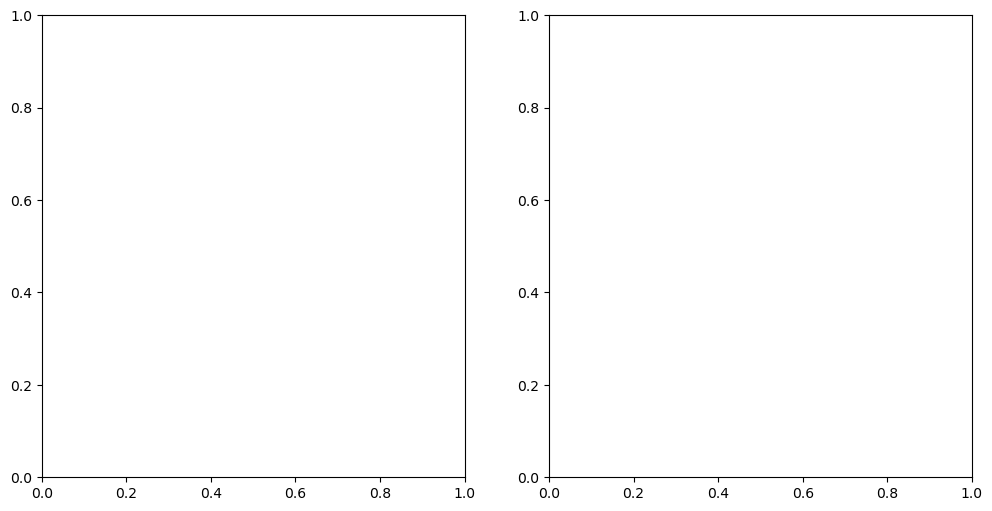

In [22]:
#Visualizamos los datos de las variables.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))



Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

In [33]:
#Antes de realizar la prueba, comprobamos si la distribución de los datos es normal o no.
df['rotacion_grupo_A'] = ((df['Group'] == 'A') & (df['Attrition'] == 'Yes')).astype(int)
df['rotacion_grupo_B'] = ((df['Group'] == 'B') & (df['Attrition'] == 'Yes')).astype(int)

#Hacemos el de Shapiro-Wilk para comprobar la normalidad.
statistic, p_value_a = stats.shapiro(df['rotacion_grupo_A'])
if p_value_a > 0.05:
    print(f"Para la columna 'rotacion_grupo_A', los datos siguen una distribución normal, p-value: {p_value_a:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: {p_value_a:.5f}")

print('...................................................................')

statistic, p_value_b = stats.shapiro(df['rotacion_grupo_B'])
if p_value_b > 0.05:
    print(f"Para la columna 'rotacion_grupo_B', los datos siguen una distribución normal, p-value: {p_value_b:.5f}")
else:
    print(f"Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: {p_value_b:.5f}")

Para la columna 'rotacion_grupo_A', los datos no siguen una distribución normal, p-value: 0.00000
...................................................................
Para la columna 'rotacion_grupo_B', los datos no siguen una distribución normal, p-value: 0.00000
